In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [180]:
uncertainty = pd.read_csv('../data/processed/uncertainty_index.csv')
epu = pd.read_csv('../data/processed/epu.csv', encoding='unicode_escape')

data = pd.merge(uncertainty,epu,on='period')

# Set 'period' as the index
data.set_index('period', inplace=True)

# Take the natural logarithm of both Y and X
data['ln_EPU'] = np.log(data['GEPU_current'])
data['ln_STNSU'] = np.log(data['uncertainty'])

data.head()

,uncertainty,GEPU_current,ln_EPU,ln_STNSU
period,,,,
2000M07,0.090649,65.123934,4.176292,-2.400757
2000M08,0.144173,54.240162,3.993422,-1.936742
2000M09,0.365126,61.000065,4.110875,-1.007512
2000M10,0.266905,68.943894,4.233293,-1.320862
2000M11,0.124076,109.420868,4.695202,-2.086861


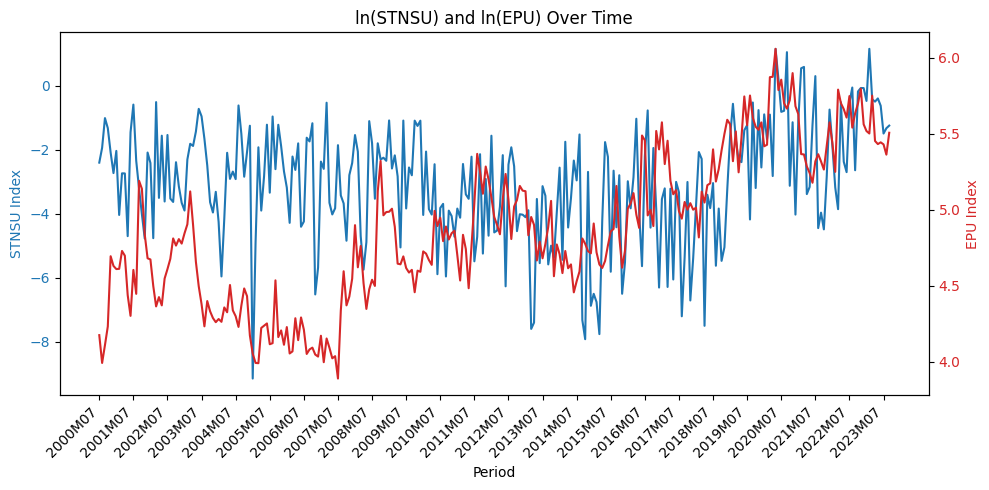

In [181]:

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the first time series on the left y-axis (ax1)
color = 'tab:blue'
ax1.set_xlabel('Period')
ax1.set_ylabel('STNSU Index', color=color)
ax1.plot(data.index, data['ln_STNSU'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis (ax2) on the right
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('EPU Index', color=color)
ax2.plot(data.index, data['ln_EPU'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set x-axis ticks at intervals of 12 periods and rotate x-labels
ax1.set_xticks(data.index[::12])
ax1.set_xticklabels(data.index[::12], rotation=45, ha='right')

# Show the plot
plt.title('ln(STNSU) and ln(EPU) Over Time')
plt.tight_layout() 
plt.show()


### Model


In [164]:

Y = data['ln_EPU']
X = data['ln_STNSU']

In [182]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Assuming X and Y are your time series data
# Example:
# X = pd.Series(...)
# Y = pd.Series(...)

def adf_test(series, name=""):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {name}: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

# Perform ADF test for X
adf_test(X, name="X")

# Perform ADF test for Y
adf_test(Y, name="Y")


ADF Statistic for X: -1.884383636757965
p-value: 0.3394428242119678
Critical Values: {'1%': -3.454988209954765, '5%': -2.8723857312734613, '10%': -2.572549407997327}
ADF Statistic for Y: -2.041961146985421
p-value: 0.2684828962303962
Critical Values: {'1%': -3.454355055831705, '5%': -2.8721080938842976, '10%': -2.572401325619835}


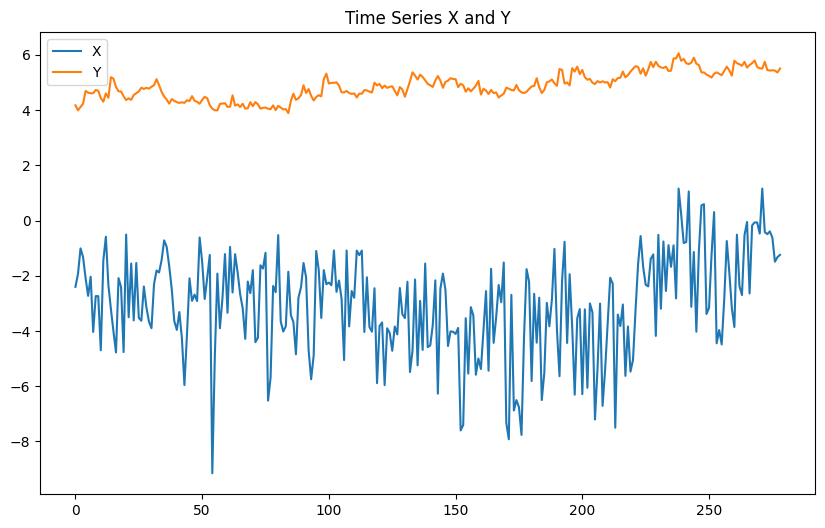

In [183]:
# Plot X and Y
plt.figure(figsize=(10, 6))
plt.plot(X, label='X')
plt.plot(Y, label='Y')
plt.legend()
plt.title('Time Series X and Y')
plt.show()


ADF Statistic for X (Differenced): -9.442606015781875
p-value: 4.849370499803515e-16
Critical Values: {'1%': -3.454988209954765, '5%': -2.8723857312734613, '10%': -2.572549407997327}
ADF Statistic for Y (Differenced): -12.841508400060313
p-value: 5.594137216171095e-24
Critical Values: {'1%': -3.454355055831705, '5%': -2.8721080938842976, '10%': -2.572401325619835}


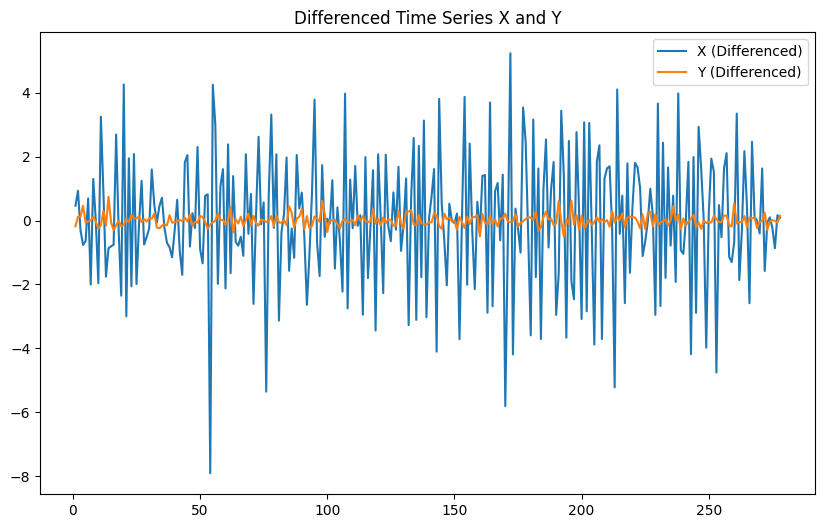

In [184]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Assuming X and Y are your time series data
# Example:
# X = pd.Series(...)
# Y = pd.Series(...)

# Perform differencing on X and Y
X_diff = X.diff().dropna()
Y_diff = Y.diff().dropna()

# Function for ADF test
def adf_test(series, name=""):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {name}: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

# Perform ADF test for differenced X
adf_test(X_diff, name="X (Differenced)")

# Perform ADF test for differenced Y
adf_test(Y_diff, name="Y (Differenced)")

# Plot differenced X and Y
plt.figure(figsize=(10, 6))
plt.plot(X_diff, label='X (Differenced)')
plt.plot(Y_diff, label='Y (Differenced)')
plt.legend()
plt.title('Differenced Time Series X and Y')
plt.show()


In [188]:
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming X_diff and Y_diff are the differenced time series
# Example:
# X_diff = pd.Series(...)
# Y_diff = pd.Series(...)

# Define the maximum lag to consider in the Granger causality test
max_lag = 4  # You can adjust this based on your data

# Perform Granger causality test
result = grangercausalitytests(pd.concat([X_diff, Y_diff], axis=1), max_lag, verbose=True)

# Interpret the results
for lag in range(1, max_lag + 1):
    print(f'Granger Causality Test at Lag {lag}:')
    print(f'F-statistic: {result[lag][0]["ssr_ftest"][0]}')
    print(f'p-value: {result[lag][0]["ssr_ftest"][1]}')
    print(f'Critical Values: {result[lag][0]["ssr_ftest"][2]}')
    print('---')



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0038  , p=0.9512  , df_denom=274, df_num=1
ssr based chi2 test:   chi2=0.0038  , p=0.9509  , df=1
likelihood ratio test: chi2=0.0038  , p=0.9509  , df=1
parameter F test:         F=0.0038  , p=0.9512  , df_denom=274, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5396  , p=0.5836  , df_denom=271, df_num=2
ssr based chi2 test:   chi2=1.0991  , p=0.5772  , df=2
likelihood ratio test: chi2=1.0970  , p=0.5778  , df=2
parameter F test:         F=0.5396  , p=0.5836  , df_denom=271, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5896  , p=0.6223  , df_denom=268, df_num=3
ssr based chi2 test:   chi2=1.8149  , p=0.6117  , df=3
likelihood ratio test: chi2=1.8090  , p=0.6130  , df=3
parameter F test:         F=0.5896  , p=0.6223  , df_denom=268, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4668  , p=0.7601  

/Users/ouharuhua/anaconda3/envs/Code_for_thesis/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
